In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from itertools import combinations
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf # Create a GLM model


In [58]:
def load_dataset_from_github(api_directory_url):
    """
    Given a GitHub API URL pointing to a repository directory, fetches all CSV files
    in that directory and returns a dictionary mapping filenames to pandas DataFrames.

    Parameters:
    -----------
    api_directory_url : str
        GitHub API URL for a repository directory, e.g.
        "https://api.github.com/repos/username/repo/contents/path/to/dir"

    Returns:
    --------
    dict[str, pandas.DataFrame]
        A dictionary where each key is a CSV filename (e.g., "data.csv")
        and each value is the corresponding DataFrame obtained from reading
        the file's raw URL.
    array of dataframes
    """
    response = requests.get(api_directory_url)
    response.raise_for_status()  # Raise an error if request failed
    files = response.json()

    dataframes = {}
    for file in files:
        name = file.get("name", "")
        if name.endswith(".csv"):
            raw_url = file.get("download_url")
            if raw_url:
                dataframes[name] = pd.read_csv(raw_url)
    ordered_names = [
        '1-mental-illnesses-prevalence.csv',
        '2-burden-disease-from-each-mental-illness.csv',
        '3-adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv',
        '4-adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv',
        '5-anxiety-disorders-treatment-gap.csv',
        '6-depressive-symptoms-across-us-population.csv',
        '7-number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv'
    ]
    dfs = [dataframes[name] for name in ordered_names]
    return dataframes, dfs

In [59]:
# Load CSV files
file_path = "https://api.github.com/repos/AAI500TeamProject/thementalists-project/contents/Dataset/MentalHealth"
dataframes, dfs = load_dataset_from_github(file_path)

In [60]:
# Drop columns
for df in dfs:
     df.drop(columns ='Code', inplace=True)

#Rename the lengthy columns to make the table compact
for df in dfs:
     df.rename(columns = {
         'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia Disorders',
          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depression Disorders',
          'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety Disorders',
          'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar Disorders',
          'Eating disorders (share of population) - Sex: Both - Age: Age-standardized' : 'Eating Disorders'
}, inplace = True)

     df.rename(columns={
          'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders': 'Depression Disorders',
          'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia': 'Schizophrenia Disorders',
          'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder': 'Bipolar Disorder',
          'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders': 'Eating Disorders',
          'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders': 'Anxiety Disorders'
}, inplace=True)

     df.rename(columns={
          'Potentially adequate treatment, conditional': 'Adequate_Treatment',
          'Other treatments, conditional': 'Other_Treatments',
          'Untreated, conditional': 'Untreated'
}, inplace=True)

     df.rename(columns={
          'Nearly every day': 'Severe_Symptoms',
          'More than half the days': 'Moderate_Symptoms',
          'Several days': 'Mild_Symptoms',
          'Not at all': 'No_Symptoms'
}, inplace=True)


     df.rename(columns={
          'Number of countries with primary data on prevalence of mental disorders': 'Countries_With_Data'
}, inplace=True)

# standardizing column names
for df in dfs:
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# Trim whitespace in string columns
for df in dfs:
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].str.strip()

# Convert data types where appropriate
for df in dfs:
    if 'year' in df.columns:
        df['year'] = pd.to_numeric(df['year'], errors='coerce', downcast='integer')

# Check for and handle missing values
for i, df in enumerate(dfs):
    print(f"\nMissing values in DataFrame {i}:")
    print(df.isnull().sum())

# Preview each DataFrame
for i, df in enumerate(dfs):
    print(f"\nDataFrame {i} Preview:")
    print(df.head())


Missing values in DataFrame 0:
entity                     0
year                       0
schizophrenia_disorders    0
depression_disorders       0
anxiety_disorders          0
bipolar_disorders          0
eating_disorders           0
dtype: int64

Missing values in DataFrame 1:
entity                     0
year                       0
depression_disorders       0
schizophrenia_disorders    0
bipolar_disorder           0
eating_disorders           0
anxiety_disorders          0
dtype: int64

Missing values in DataFrame 2:
entity              0
year                0
major_depression    0
dtype: int64

Missing values in DataFrame 3:
entity               0
year                 0
major_depression     0
bipolar_disorder     0
eating_disorders     0
dysthymia            0
schizophrenia        0
anxiety_disorders    0
dtype: int64

Missing values in DataFrame 4:
entity                0
year                  0
adequate_treatment    0
other_treatments      0
untreated             0
dtype: int64

In [61]:
for i, df in enumerate(dfs, start=5):
    print(f"{'='*60}")
    print(f"📊 DataFrame {i} Summary")
    print(f"{'='*60}")

    # Show basic info
    print(f"Shape: {df.shape}")
    print(f"\nColumns:\n{list(df.columns)}")

    # Show missing values neatly
    print(f"\nMissing Values:\n{df.isnull().sum()[df.isnull().sum() > 0].to_string()}")

    # Show preview
    print("\nPreview (first 5 rows):")
    display(df.head())  # Jupyter-friendly display

📊 DataFrame 5 Summary
Shape: (6420, 7)

Columns:
['entity', 'year', 'schizophrenia_disorders', 'depression_disorders', 'anxiety_disorders', 'bipolar_disorders', 'eating_disorders']

Missing Values:
Series([], )

Preview (first 5 rows):


,entity,year,schizophrenia_disorders,depression_disorders,anxiety_disorders,bipolar_disorders,eating_disorders
0,Afghanistan,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,1994,0.220183,4.977782,4.670810,0.699898,0.111815


📊 DataFrame 6 Summary
Shape: (6840, 7)

Columns:
['entity', 'year', 'depression_disorders', 'schizophrenia_disorders', 'bipolar_disorder', 'eating_disorders', 'anxiety_disorders']

Missing Values:
Series([], )

Preview (first 5 rows):


,entity,year,depression_disorders,schizophrenia_disorders,bipolar_disorder,eating_disorders,anxiety_disorders
0,Afghanistan,1990,895.22565,138.24825,147.64412,26.471115,440.33000
1,Afghanistan,1991,893.88434,137.76122,147.56696,25.548681,439.47202
2,Afghanistan,1992,892.34973,137.08030,147.13086,24.637949,437.60718
3,Afghanistan,1993,891.51587,136.48602,146.78812,23.863169,436.69104
4,Afghanistan,1994,891.39160,136.18323,146.58481,23.189074,436.76800


📊 DataFrame 7 Summary
Shape: (22, 3)

Columns:
['entity', 'year', 'major_depression']

Missing Values:
Series([], )

Preview (first 5 rows):


,entity,year,major_depression
0,Andean Latin America,2008,0.0
1,Asia Pacific,2008,80.8
2,Australasia,2008,100.0
3,Caribbean,2008,9.1
4,Central Asia,2008,0.0


📊 DataFrame 8 Summary
Shape: (22, 8)

Columns:
['entity', 'year', 'major_depression', 'bipolar_disorder', 'eating_disorders', 'dysthymia', 'schizophrenia', 'anxiety_disorders']

Missing Values:
Series([], )

Preview (first 5 rows):


,entity,year,major_depression,bipolar_disorder,eating_disorders,dysthymia,schizophrenia,anxiety_disorders
0,Andean Latin America,2008,0.0,0.0,0.0,0.0,0,0.0
1,Asia Pacific,2008,80.8,3.8,23.1,1.0,71.6,93.1
2,Australasia,2008,100.0,100.0,16.4,100.0,85.1,100.0
3,Caribbean,2008,9.1,0.0,0.0,0.0,28.3,0.0
4,Central Asia,2008,0.0,0.0,0.0,0.0,0,0.0


📊 DataFrame 9 Summary
Shape: (26, 5)

Columns:
['entity', 'year', 'adequate_treatment', 'other_treatments', 'untreated']

Missing Values:
Series([], )

Preview (first 5 rows):


,entity,year,adequate_treatment,other_treatments,untreated
0,Argentina,2015,12.0,18.0,70.0
1,"Beijing/Shanghai, China",2005,8.8,8.5,82.7
2,Belgium,2002,11.2,24.5,64.3
3,Bulgaria,2006,7.3,14.3,78.4
4,Colombia,2012,3.2,10.0,86.8


📊 DataFrame 10 Summary
Shape: (10, 6)

Columns:
['entity', 'year', 'severe_symptoms', 'moderate_symptoms', 'mild_symptoms', 'no_symptoms']

Missing Values:
Series([], )

Preview (first 5 rows):


,entity,year,severe_symptoms,moderate_symptoms,mild_symptoms,no_symptoms
0,Appetite change,2014,4.6,5.1,15.5,74.8
1,Average across symptoms,2014,4.4,4.3,15.0,76.3
2,Depressed mood,2014,3.6,3.9,16.8,75.7
3,Difficulty concentrating,2014,3.5,3.6,10.9,82.1
4,Loss of interest,2014,4.4,5.4,16.3,73.8


📊 DataFrame 11 Summary
Shape: (15, 3)

Columns:
['entity', 'year', 'countries_with_data']

Missing Values:
Series([], )

Preview (first 5 rows):


,entity,year,countries_with_data
0,Alcohol use disorders,2019,58
1,Amphetamine use disorders,2019,58
2,Anorexia nervosa,2019,27
3,Anxiety disorders,2019,58
4,Attention-deficit hyperactivity disorder,2019,172


# Correlation and Covariance Heat Map 
##### Only applied on dataset #1 and #2
    High correlation and high covariance -> strong linear relationship with similar variance scale. -> could be used for linear regression 

    High correlation but very low covariance m ay indicate the variables vary similarly in pattern but not in magnitude.

    Very low covariance (close to zero) -> almost no shared variance even if the correlation is moderate.

## mental-illnesses-prevalence                              

Boxplot for Column Name: schizophrenia_disorders


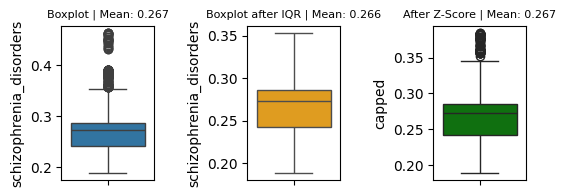

Boxplot for Column Name: depression_disorders


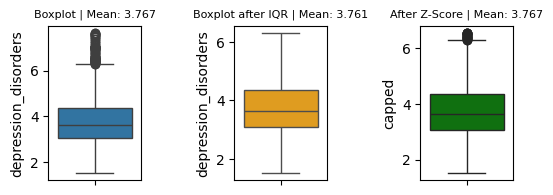

Boxplot for Column Name: anxiety_disorders


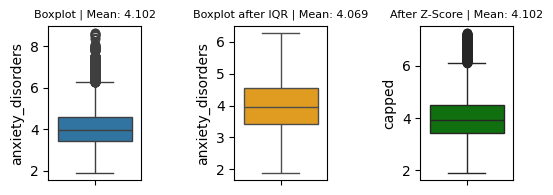

Boxplot for Column Name: bipolar_disorders


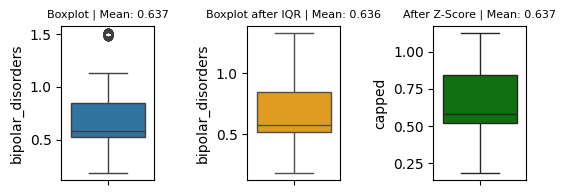

Boxplot for Column Name: eating_disorders


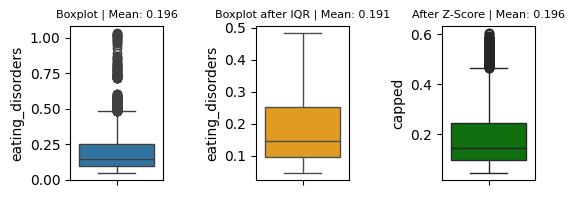

In [86]:
df_skip = dataframes['1-mental-illnesses-prevalence.csv'].iloc[:, 2:]
df_skip = df_skip.apply(pd.to_numeric, errors='coerce') 
for column in df_skip:
    print(f"Boxplot for Column Name: {column}")
    #draw boxplot and kde before analyte to visualize the outliers
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(6, 2))
    plt.subplots_adjust(wspace=1, hspace=0.25)
    axes[0].set_title(f'Boxplot | Mean: {df_skip[column].mean():.3f}', fontsize=8)
    sns.boxplot(y=df_skip[column], ax=axes[0])

    #handle outliers using IQR
    Q1 = df_skip[column].quantile(0.25)
    Q3 = df_skip[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_iqr = df_skip[[column]].copy()
    df_iqr[column]= df_skip[column].clip(lower=lower_bound, upper=upper_bound)

    #draw boxplot after handling outliers
    axes[1].set_title(f'Boxplot after IQR | Mean: {df_iqr[column].mean():.3f}', fontsize=8)
    sns.boxplot(y=df_iqr[column], ax=axes[1], color='orange')

    # Try z-score method to compare results with IQR method
    df_z = df_skip[[column]].copy()
    df_z['z_score'] = zscore(df_z[column]) 
    df_z['capped'] = df_z[column].where(df_z['z_score'].abs() <= 3) #created capped column to cap values smaller or equal to z-score 3 which is 99.7%

    axes[2].set_title(f'After Z-Score | Mean: {df_z[column].mean():.3f}', fontsize=8)        
    sns.boxplot(y=df_z['capped'].dropna(), ax=axes[2], color='green')

    
    plt.show()

We decided not to remove outliers from the dataset for the following reasons:

In most cases, the outliers did not significantly affect the mean, indicating a relatively stable central tendency.

While some variables showed a noticeable shift in the mean, the outliers still represent valid, real-world observations rather than data entry errors.

These rare but extreme values could carry important information, especially in the context of mental health prevalence, and may be valuable for model learning, anomaly detection, or identifying high-risk populations.

Removing them could lead to a loss of meaningful patterns and potentially limit the model’s generalizability to edge cases.

Therefore, we chose to retain the outliers to preserve the full data distribution and ensure the model captures both common and exceptional conditions.

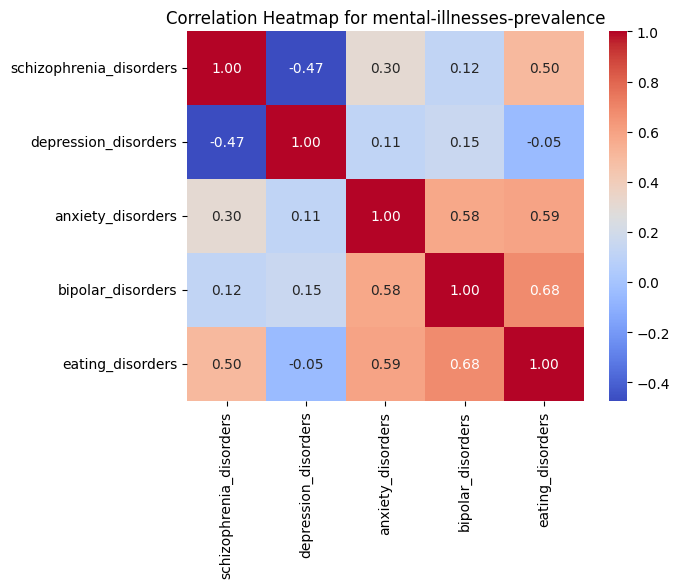

In [87]:

corr_matrix = df_skip.corr()

#draw heatmap for correlation matrix for tables that has more than 2 columns
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for mental-illnesses-prevalence')
plt.show()

| Column                      | Strongest Correlation With                        | Correlation Value | Independent?     |
| --------------------------- | ------------------------------------------------- | ----------------- | ---------------- |
| `schizophrenia_disorders`   | `eating_disorders`                                | **+0.50**         | No               |
| `depression_disorders`      | `schizophrenia_disorders`                         | **–0.47**         | Weak/moderate    |
| `anxiety_disorders`         | `eating_disorders` / `bipolar_disorders`          | **\~0.58–0.59**   |No                |
| `bipolar_disorders`         | `eating_disorders`                                | **+0.68**         | No               |
| `eating_disorders`          | `bipolar_disorders`                               | **+0.68**         | No               |


depression_disorders has weaker correlations with the rest (e.g., only –0.47 with schizophrenia and near-zero with others), so it's the most independent in this set.

All others are moderately correlated, especially with eating disorders and bipolar disorders.


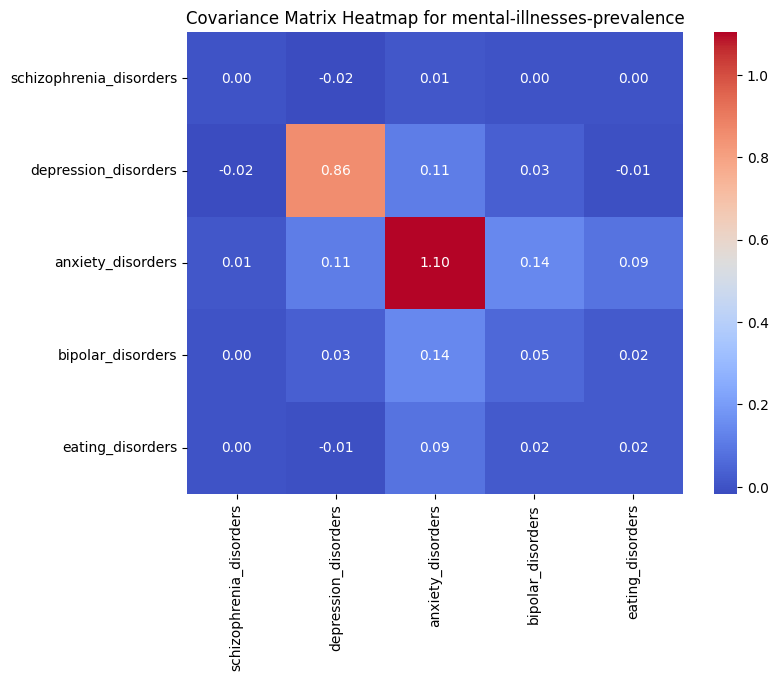

                Variable 1         Variable 2  Correlation  Covariance
0  schizophrenia_disorders   eating_disorders     0.500656    0.002728
1        anxiety_disorders  bipolar_disorders     0.576230    0.141284
2        anxiety_disorders   eating_disorders     0.594511    0.086427
3        bipolar_disorders   eating_disorders     0.677927    0.021895


In [88]:
cov_matrix = df_skip.cov()

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Covariance Matrix Heatmap for mental-illnesses-prevalence")
plt.show()

strong_corr_pairs = []

# Find pairs of variables with strong correlation (|corr| >= 0.5) and their covariance
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.loc[col1, col2]
        if abs(corr_val) >= 0.5:
            cov_val = cov_matrix.loc[col1, col2]
            strong_corr_pairs.append((col1, col2, corr_val, cov_val))
result_df = pd.DataFrame(strong_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation', 'Covariance'])
print(result_df)

| Variable Pair                                    | Correlation | Covariance | Interpretation                                                                              |
| ------------------------------------------------ | ----------- | ---------- | ------------------------------------------------------------------------------------------- |
| **bipolar\_disorders & eating\_disorders**       | **0.678**   | **0.0219** | Strong correlation; moderate covariance — they move together well and on a similar scale.   |
| **anxiety\_disorders & eating\_disorders**       | **0.595**   | **0.0864** | Also strongly related, and the high covariance shows they vary together with similar units. |
| **anxiety\_disorders & bipolar\_disorders**      | **0.576**   | **0.1413** | Strongest covariance in this list -> similar unit spread and mutual variation.               |
| **schizophrenia\_disorders & eating\_disorders** | **0.501**   | **0.0027** | Moderate correlation, but **very small covariance** — may differ in scale significantly.    |



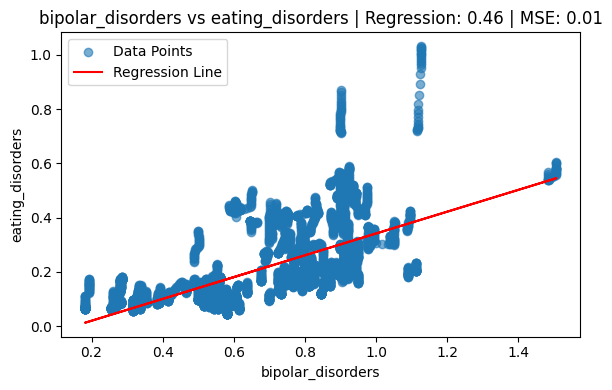

In [92]:
col_x = "bipolar_disorders"
col_y = "eating_disorders"

X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()



Positive linear relationship is clearly visible.

$R^2$ = 0.46:

-> This means about 46% of the variation in eating_disorders is explained by bipolar_disorders

-> This is a moderately strong linear association

MSE = 0.01:

-> Low mean squared error, indicating tight residuals








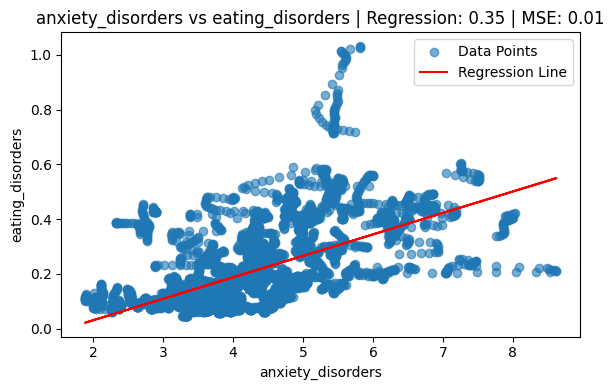

In [21]:
col_x = "anxiety_disorders"
col_y = "eating_disorders"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

A positive linear relationship between anxiety_disorders and eating_disorders $R^2$ =0.35: \
-> About 35% of the variance in eating disorder rates is explained by anxiety disorder rates

MSE = 0.01: \
-> The average squared prediction error is small, which is good

The points show spread increasing slightly as anxiety increases, but overall look fairly evenly distributed



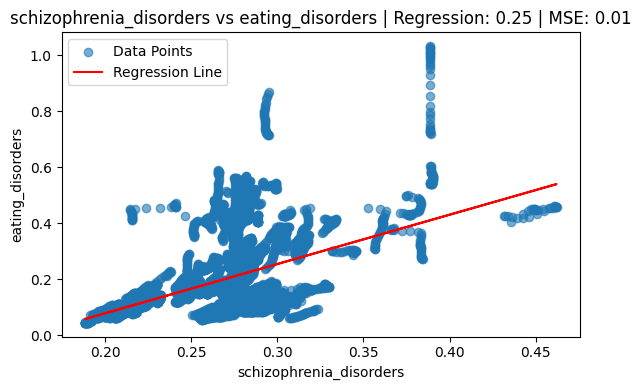

In [67]:
col_x = "schizophrenia_disorders"
col_y = "eating_disorders"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

Positive linear relationship: As schizophrenia_disorders increases, eating_disorders also tends to increase.

$R^2$ = 0.25:

-> About 25% of the variance in eating disorders is explained by schizophrenia disorders — a weak to moderate relationship

-> That's a moderate relationship.

MSE	0.01

-> Very low error, this is expected because the target variable ranges between 0 and 1

In [ ]:
normal_model = smf.glm("eating_disorders ~ bipolar_disorders + anxiety_disorders + schizophrenia_disorders", data=df_skip, family=sm.families.Gaussian()).fit() # GLMs with Gaussian family - normal model
print(f"Normal GLM Summary: {normal_model.summary()}")

Normal GLM Summary:                  Generalized Linear Model Regression Results                  
Dep. Variable:       eating_disorders   No. Observations:                 6420
Model:                            GLM   Df Residuals:                     6416
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                       0.0066100
Method:                          IRLS   Log-Likelihood:                 7004.0
Date:                Mon, 16 Jun 2025   Deviance:                       42.410
Time:                        22:10:10   Pearson chi2:                     42.4
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8500
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

| Term                         | Coef    | P-value | Interpretation                                                                                                                       |
| ---------------------------- | ------- | ------- | ------------------------------------------------------------------------------------------------------------------------------------ |
| Intercept                    | -0.4575 | < 0.001 | Baseline level of eating\_disorders when all predictors = 0 (not meaningful in isolation)                                            |
| **bipolar\_disorders**       | 0.3160  | < 0.001 | **Strong positive effect**: 1 unit increase in bipolar\_disorders is associated with a **+0.316** unit increase in eating\_disorders |
| **anxiety\_disorders**       | 0.0225  | < 0.001 | Small positive effect, still significant                                                                                             |
| **schizophrenia\_disorders** | 1.3492  | < 0.001 | Large and significant positive effect — highest impact per unit                                                                      |

We seeing a strong unique effect of schizophrenia in the multivariable model, even though its simple correlation is weak.
That means schizophrenia’s influence is masked by shared variance with bipolar/anxiety

Null Hypothesis $H_0 \beta_1 = \beta_2 = \beta_3:$ None of the predictors have a linear relationship with eating_disorders.

Alternative Hypothesis  $H_a \beta_i \neq 0$: At least one predictor has a significant linear relationship.

-> All predictors are statistically significant at the 0.05 level (P < 0.001) -> we reject the null hypothesis

-> The model likely has decent explanatory power (though $R^2$ is 0.085 — modest)

    bipolar_disorders and schizophrenia_disorders are strong predictors of eating_disorders

    anxiety_disorders also contributes, but with a smaller effect

    The model suggests that increases in any of these disorders are associated with higher prevalence of eating disorders

A multiple linear regression was conducted to examine whether bipolar disorders, anxiety disorders, and schizophrenia disorders significantly predict the prevalence of eating disorders. \
The model was statistically significant. Each predictor was a significant positive contributor, with schizophrenia disorders showing the strongest effect. \
Thus, we reject the null hypothesis and conclude that these mental health disorders are significant predictors of eating disorder prevalence.

## burden-disease-from-each-mental-illness

Boxplot for Column Name: depression_disorders


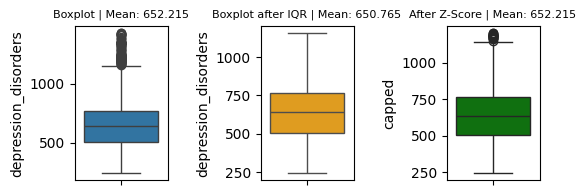

Boxplot for Column Name: schizophrenia_disorders


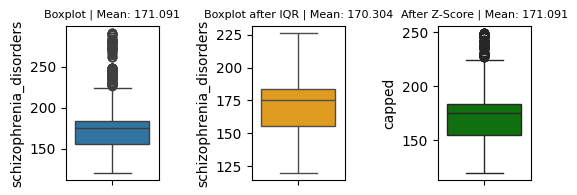

Boxplot for Column Name: bipolar_disorder


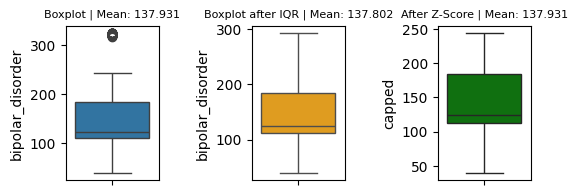

Boxplot for Column Name: eating_disorders


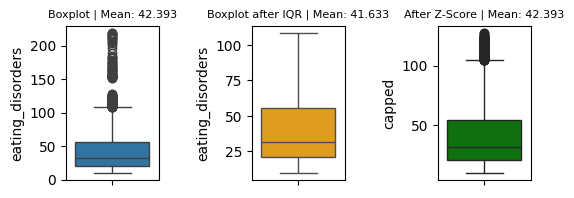

Boxplot for Column Name: anxiety_disorders


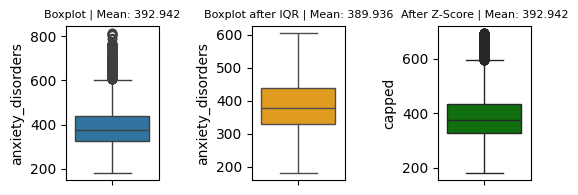

In [103]:
df_skip = dataframes['2-burden-disease-from-each-mental-illness.csv'].iloc[:, 2:]
df_skip = df_skip.apply(pd.to_numeric, errors='coerce') 
for column in df_skip:
    print(f"Boxplot for Column Name: {column}")
    #draw boxplot and kde before analyte to visualize the outliers
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(6, 2))
    plt.subplots_adjust(wspace=1, hspace=0.25)
    axes[0].set_title(f'Boxplot | Mean: {df_skip[column].mean():.3f}', fontsize=8)
    sns.boxplot(y=df_skip[column], ax=axes[0])

    #handle outliers using IQR
    Q1 = df_skip[column].quantile(0.25)
    Q3 = df_skip[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_iqr = df_skip[[column]].copy()
    df_iqr[column]= df_skip[column].clip(lower=lower_bound, upper=upper_bound)

    #draw boxplot after handling outliers
    axes[1].set_title(f'Boxplot after IQR | Mean: {df_iqr[column].mean():.3f}', fontsize=8)
    sns.boxplot(y=df_iqr[column], ax=axes[1], color='orange')

    # Try z-score method to compare results with IQR method
    df_z = df_skip[[column]].copy()
    df_z['z_score'] = zscore(df_z[column]) 
    df_z['capped'] = df_z[column].where(df_z['z_score'].abs() <= 3) #created capped column to cap values smaller or equal to z-score 3 which is 99.7%

    axes[2].set_title(f'After Z-Score | Mean: {df_z[column].mean():.3f}', fontsize=8)        
    sns.boxplot(y=df_z['capped'].dropna(), ax=axes[2], color='green')

    
    plt.show()

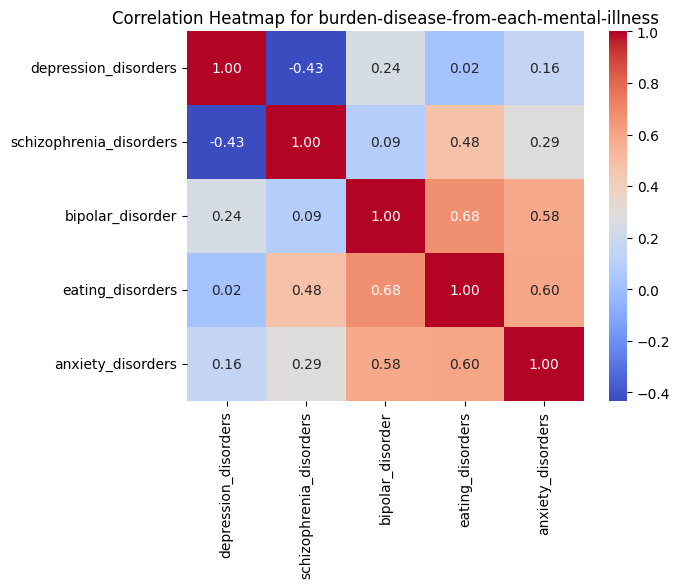

In [104]:
corr_matrix = df_skip.corr()

#draw heatmap for correlation matrix for tables that has more than 2 columns
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for burden-disease-from-each-mental-illness')
plt.show()

| Column               | Highest Absolute Correlation | Likely Independent?      |
| -------------------- | ---------------------------- | ------------------------ |
| **Depression**       | –0.43                        | Yes (most independent) |
| **Schizophrenia**    | 0.48                         | Somewhat correlated   |
| **Bipolar, Anxiety** | >0.5 with others             | No (highly correlated) |
| **Eating Disorders** | 0.6+ with 2 others           | No                     |


Depression burden is most independent from the others (nearly uncorrelated or negatively correlated).

Eating disorders, bipolar, and anxiety burdens are highly interrelated 

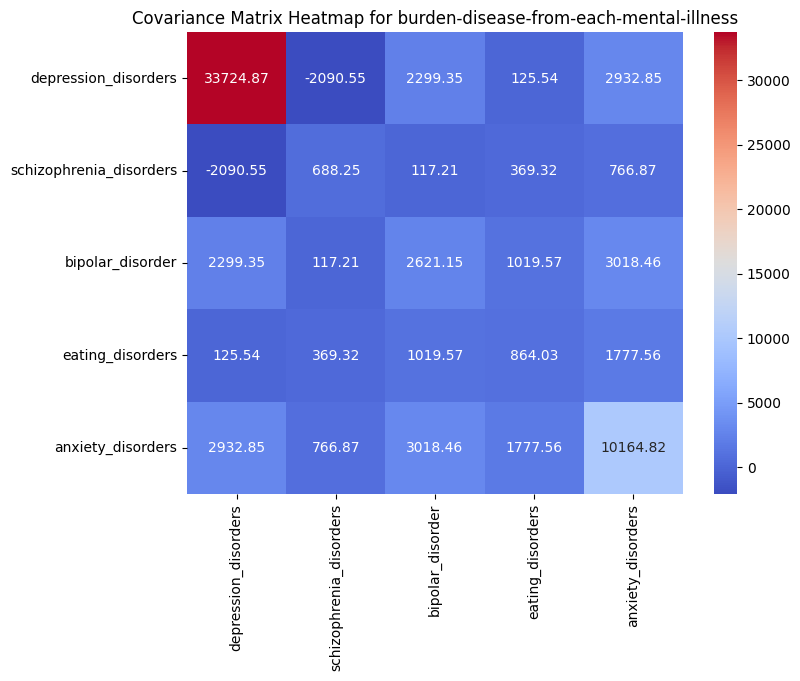

         Variable 1         Variable 2  Correlation   Covariance
0  bipolar_disorder   eating_disorders     0.677496  1019.569393
1  bipolar_disorder  anxiety_disorders     0.584777  3018.464103
2  eating_disorders  anxiety_disorders     0.599805  1777.559998


In [105]:
cov_matrix = df_skip.cov()

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Covariance Matrix Heatmap for burden-disease-from-each-mental-illness")
plt.show()

strong_corr_pairs = []

# Find pairs of variables with strong correlation (|corr| >= 0.5) and their covariance
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.loc[col1, col2]
        if abs(corr_val) >= 0.5:
            cov_val = cov_matrix.loc[col1, col2]
            strong_corr_pairs.append((col1, col2, corr_val, cov_val))
result_df = pd.DataFrame(strong_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation', 'Covariance'])
print(result_df)

| Pair                            | Correlation | Covariance | Interpretation                                                        |
| ------------------------------- | ----------- | ---------- | --------------------------------------------------------------------- |
| **Bipolar & Eating Disorders**  | 0.677       | 1019.57    | Strong linear relationship, large shared variance                     |
| **Bipolar & Anxiety Disorders** | 0.585       | 3018.46    | Strong correlation with very high covariance (high unit variance too) |
| **Eating & Anxiety Disorders**  | 0.600       | 1777.56    | Strong correlation, moderate-to-high covariance                       |



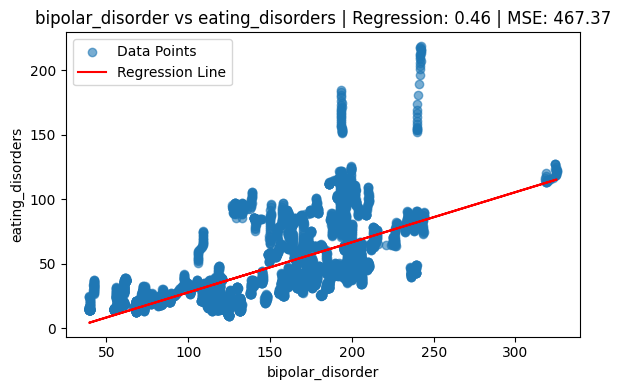

In [106]:
col_x = "bipolar_disorder"
col_y = "eating_disorders"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

Positive linear trend:
-> The red regression line indicates that as bipolar_disorder values increase, eating_disorders tend to increase as well.

$R^2$ = 0.46:
-> This means 46% of the variance in eating_disorders is explained by bipolar_disorder. That's a moderately strong linear relationship.

MSE = 467.37:
-> On average, the squared error between predicted and actual values is fairly high, which suggests some spread around the regression line, especially at higher values.

The model confirms a statistically significant positive relationship between bipolar_disorder and eating_disorders.
As the number or rate of bipolar disorder cases increases, so does the rate or number of eating disorder cases.

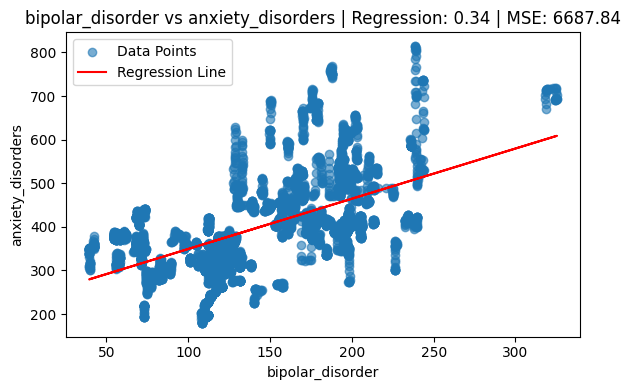

In [107]:
col_x = "bipolar_disorder"
col_y = "anxiety_disorders"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

The regression line slopes upward, suggesting that as bipolar_disorder increases, anxiety_disorders also tend to increase.

R² = 0.34:
-> This means about 34% of the variance in anxiety_disorders is explained by bipolar_disorder — a moderate relationship.

MSE = 6687.84:
-> The relatively large Mean Squared Error reflects the fact that anxiety_disorders has larger values, possibly ranging from ~200 to 800. So although the MSE looks high, it may be reasonable given the scale.

There is a moderate positive linear relationship between bipolar_disorder and anxiety_disorders.
As bipolar_disorder rates increase, anxiety_disorders tend to increase as well.



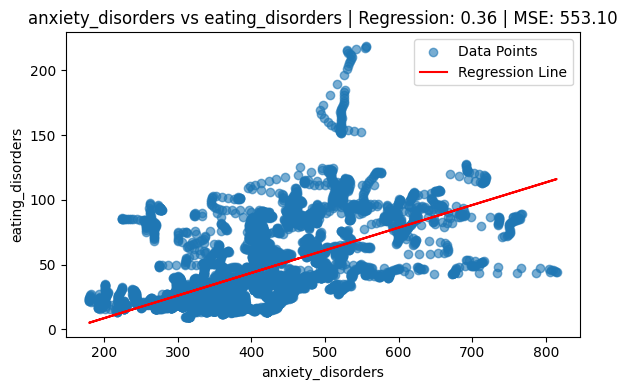

In [108]:
col_x = "anxiety_disorders"
col_y = "eating_disorders"
X = df_skip[[col_x]]
y = df_skip[col_y]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title(f'{col_x} vs {col_y} | Regression: {r2:.2f} | MSE: {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

The regression line shows a clear upward slope as eating_disorders increases, anxiety_disorders also tend to increase.

R² = 0.36:
About 36% of the variation in anxiety_disorders is explained by eating_disorders.
-> This is a moderate relationship.

MSE = 6506.91:
Given that anxiety_disorders values range up to ~800, this magnitude is acceptable.

There is a moderate positive relationship between eating disorder rates and anxiety disorder rates.
As eating disorders increase in a region or population, anxiety disorders also tend to increase.

In [ ]:
normal_model = smf.glm("eating_disorders ~ bipolar_disorder + anxiety_disorders", data=df_skip, family=sm.families.Gaussian()).fit() # GLMs with Gaussian family - normal model 
print(f"Normal GLM Summary: {normal_model.summary()}") 

Normal GLM Summary:                  Generalized Linear Model Regression Results                  
Dep. Variable:       eating_disorders   No. Observations:                 6840
Model:                            GLM   Df Residuals:                     6837
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          413.12
Method:                          IRLS   Log-Likelihood:                -30305.
Date:                Tue, 17 Jun 2025   Deviance:                   2.8245e+06
Time:                        23:01:02   Pearson chi2:                 2.82e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6643
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         

Null Hypothesis $H_0: \beta_1 = \beta_2 = 0$: Mental health disorders (bipolar + anxiety) do not significantly predict eating disorders.\
Alternative Hypothesis $H_a: \beta_i \neq 0$: Mental health disorders (bipolar + anxiety) significantly predict eating disorders.

| Predictor              | Coef     | P-value | 95% CI              | Interpretation                                                   |
| ---------------------- | -------- | ------- | ------------------- | ---------------------------------------------------------------- |
| **Intercept**          | -32.3792 | 0.000   | \[-34.333, -30.425] | Baseline when both predictors are 0 (not directly interpretable) |
| **bipolar\_disorder**  | 0.2851   | 0.000   | \[0.273, 0.297]     | Significant positive effect on eating disorders                  |
| **anxiety\_disorders** | 0.0902   | 0.000   | \[0.084, 0.096]     | Also significant positive effect                                 |


Both predictors are statistically significant (p < 0.001)

Bipolar disorder has a larger effect than anxiety on eating disorder rates.

-> For every 1-unit increase in bipolar_disorder DALY rate, eating_disorders increases by ~0.285 units

-> For every 1-unit increase in anxiety_disorders, eating_disorders increases by ~0.0902 units

The model explains 66.4% of the variation in eating disorder DALYs, which is very strong.

A multiple linear regression showed that both bipolar disorder and anxiety disorder rates significantly predict the burden of eating disorders (p < 0.001 for both). \
The model explains 66.4% of the variance in eating disorder DALY rates, with bipolar disorder having a stronger predictive impact than anxiety

We reject the null hypothesis.
Both bipolar and anxiety disorders significantly predict eating disorder DALY rates (p < 0.001).
Therefore, yes, we can use multiple mental health disorders to effectively predict eating disorder burden in a population.
The model explains 66.4% of the variation in eating disorder rates, indicating a strong and meaningful relationship.

# Histogram

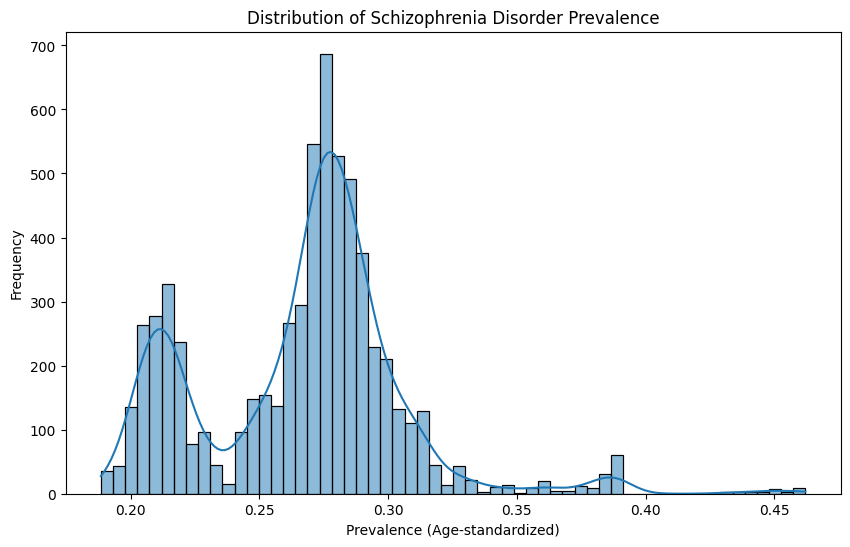

In [113]:
# Example histogram for a targeted variable
# Below this cell will be histograms for all
plt.figure(figsize=(10, 6))
sns.histplot(dfs[0]['schizophrenia_disorders'], kde=True)
plt.title('Distribution of Schizophrenia Disorder Prevalence')
plt.xlabel('Prevalence (Age-standardized)')
plt.ylabel('Frequency')
plt.show()


Plotting histograms for DataFrame 0


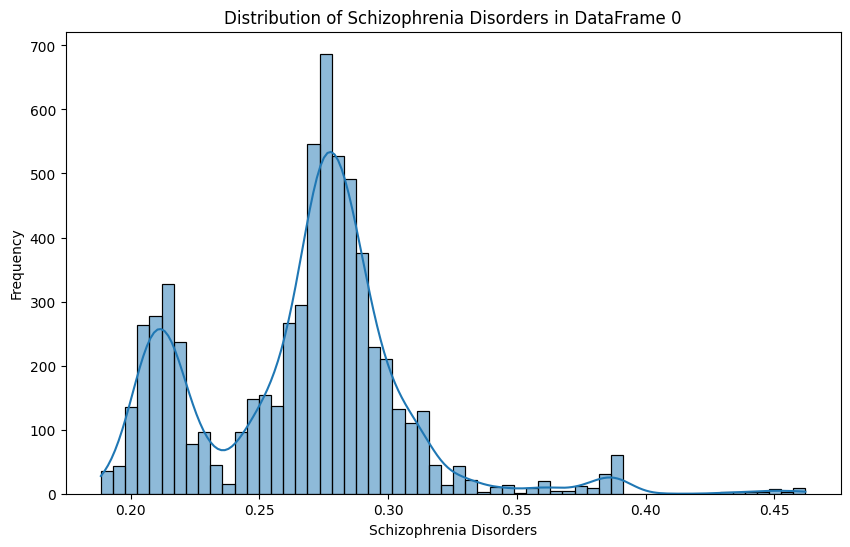

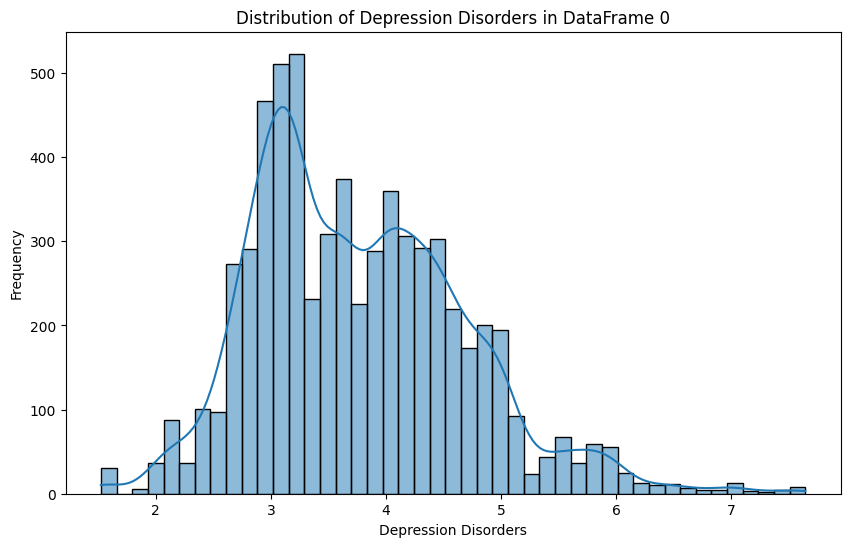

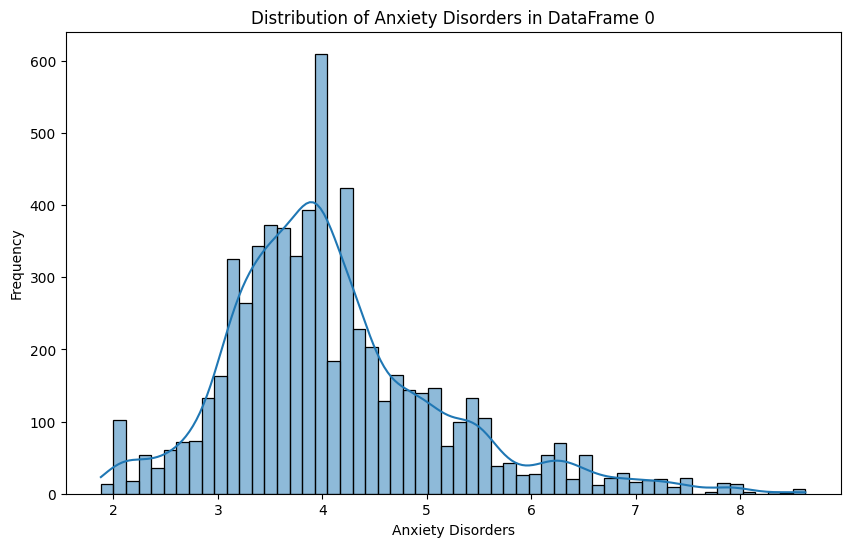

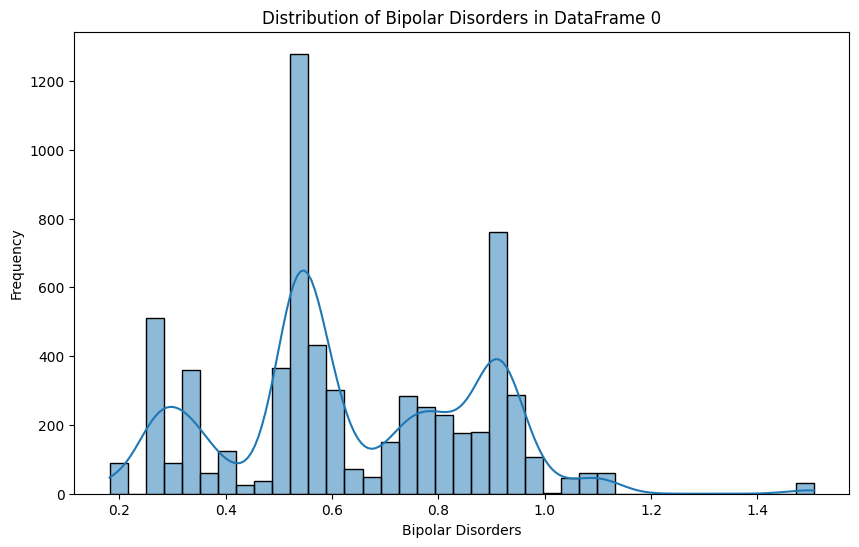

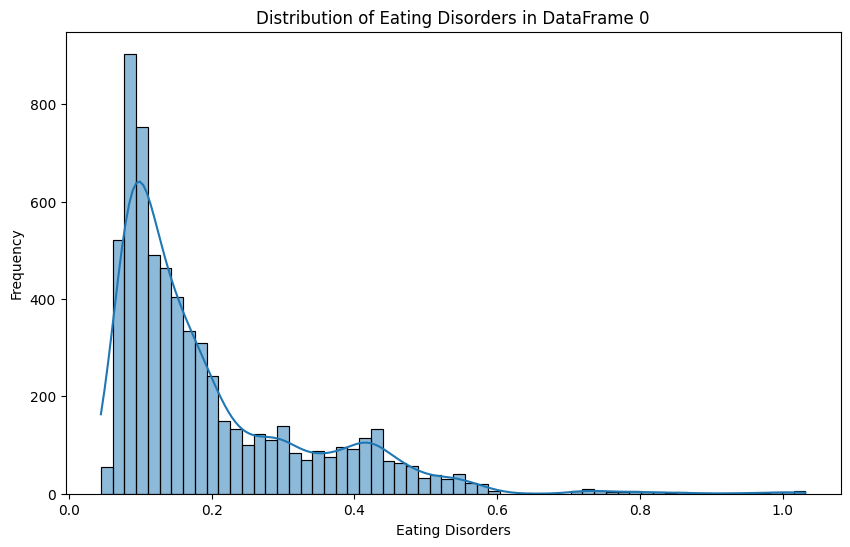


Plotting histograms for DataFrame 1


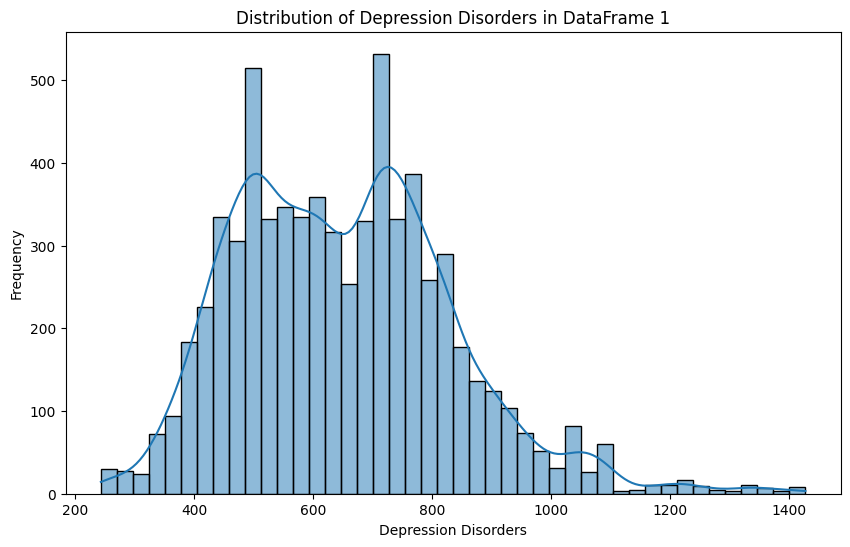

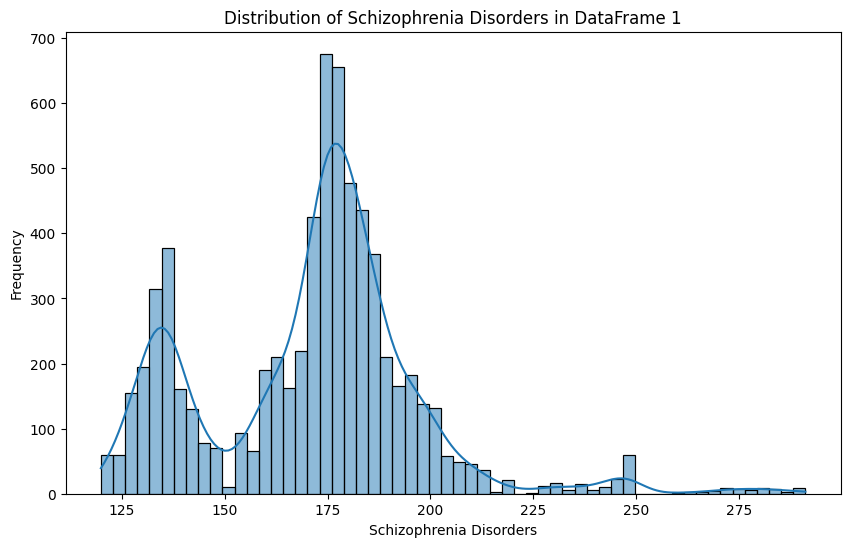

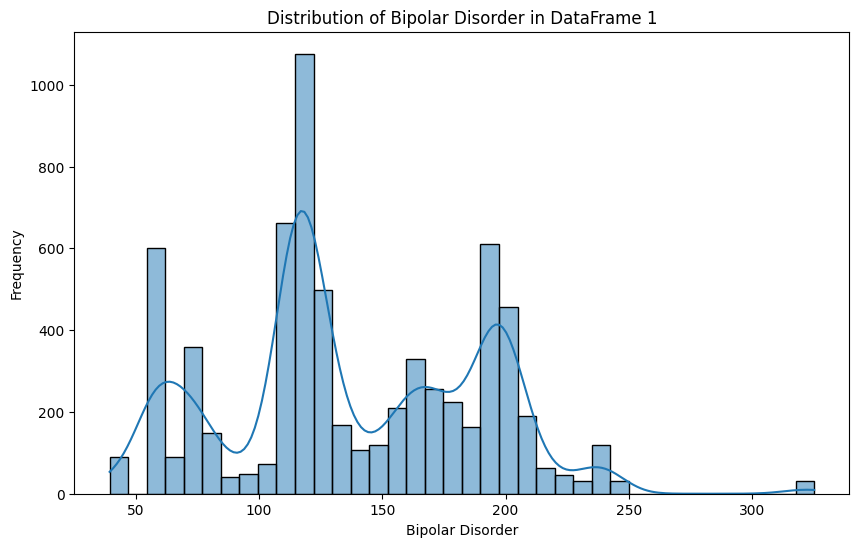

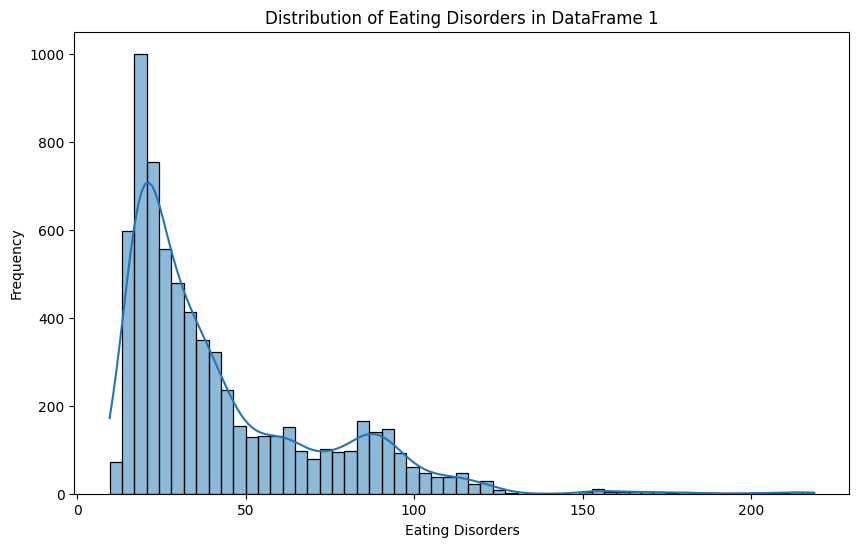

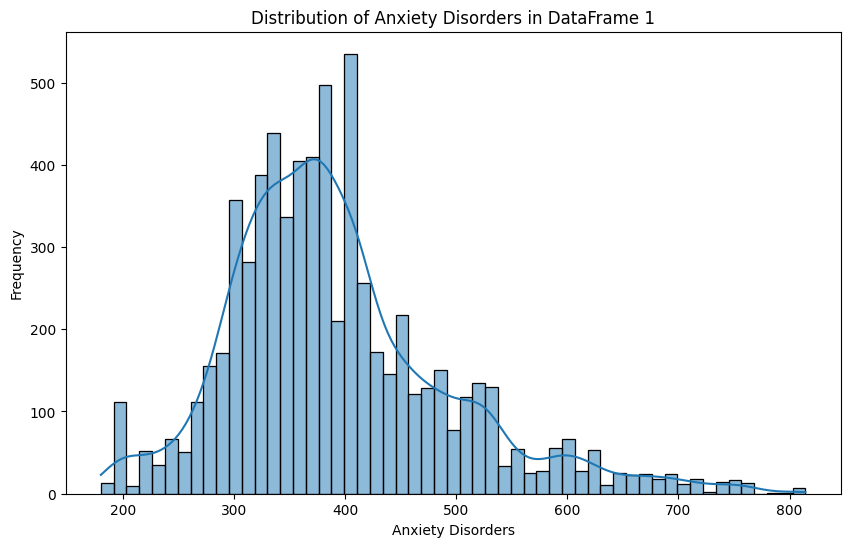


Plotting histograms for DataFrame 2


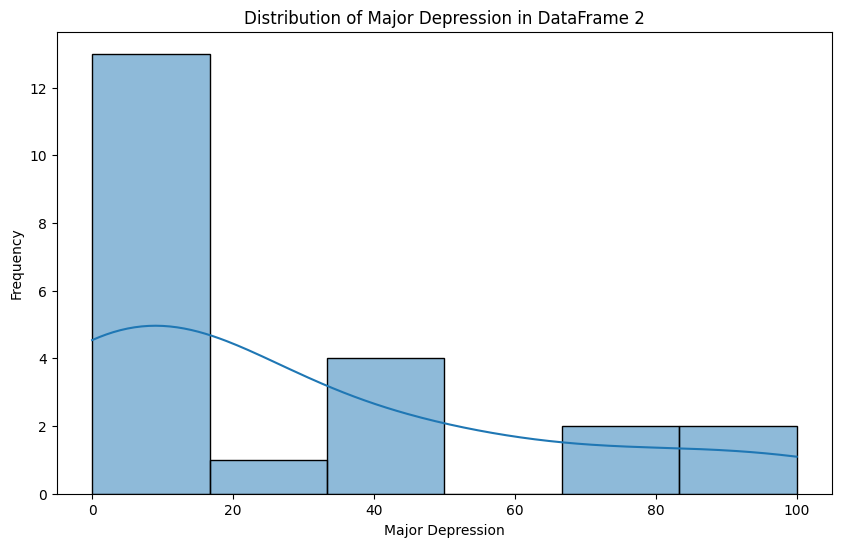


Plotting histograms for DataFrame 3


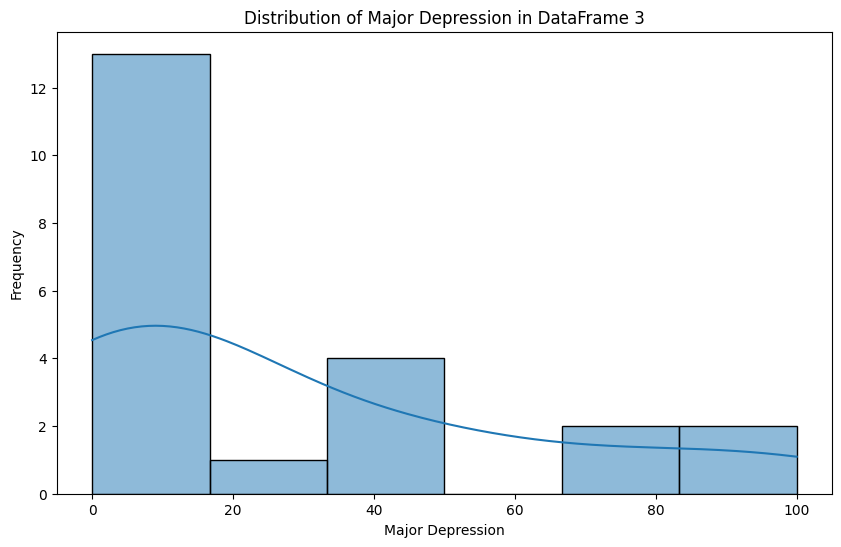

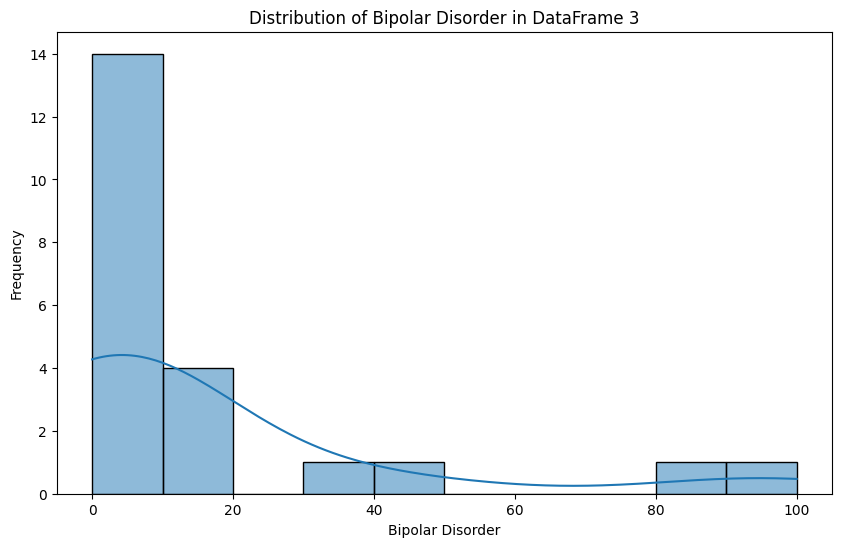

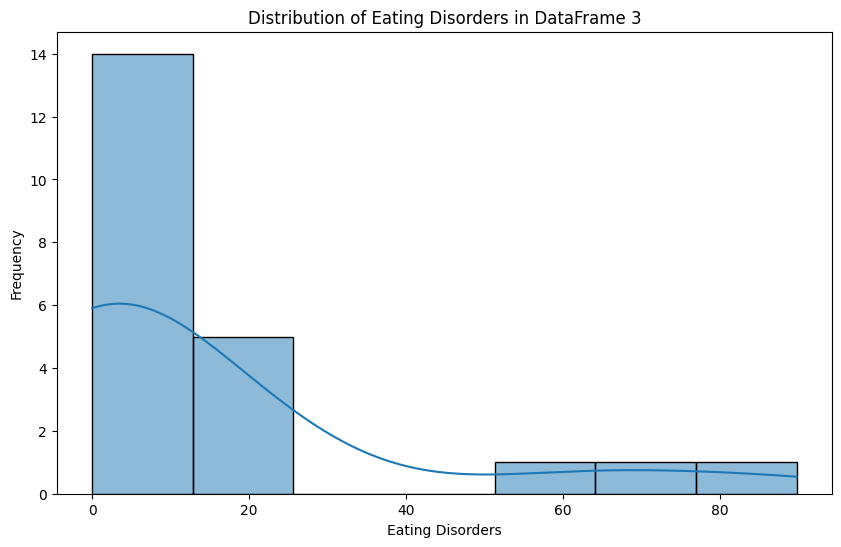

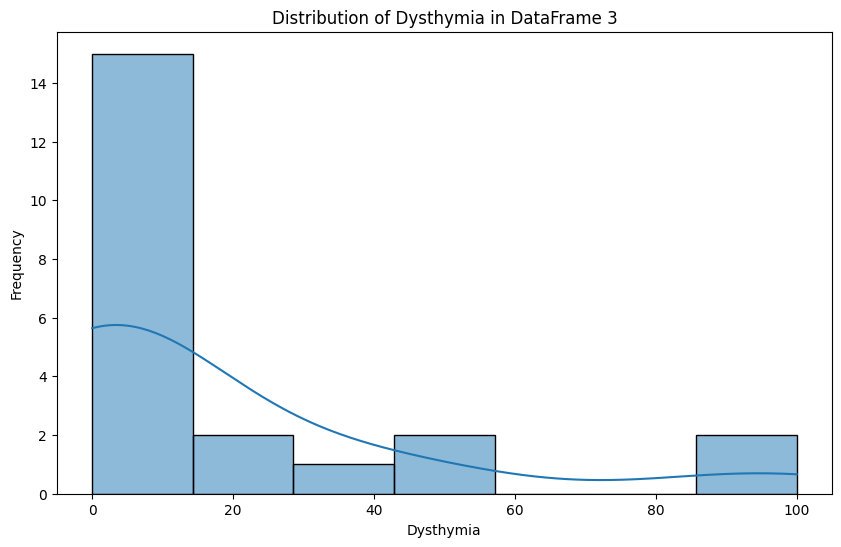

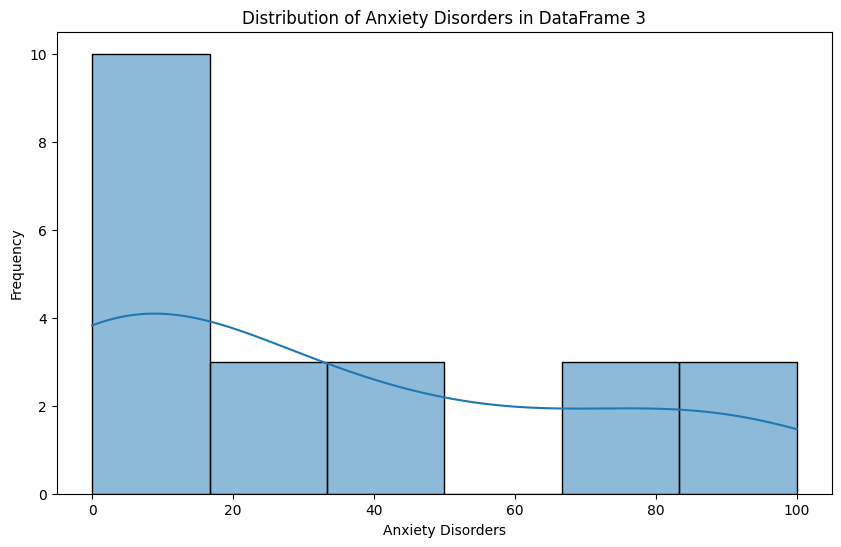


Plotting histograms for DataFrame 4


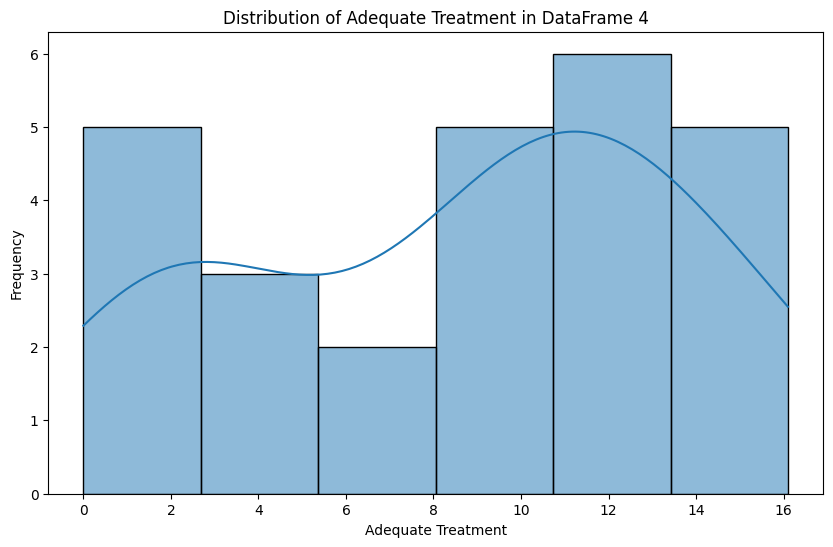

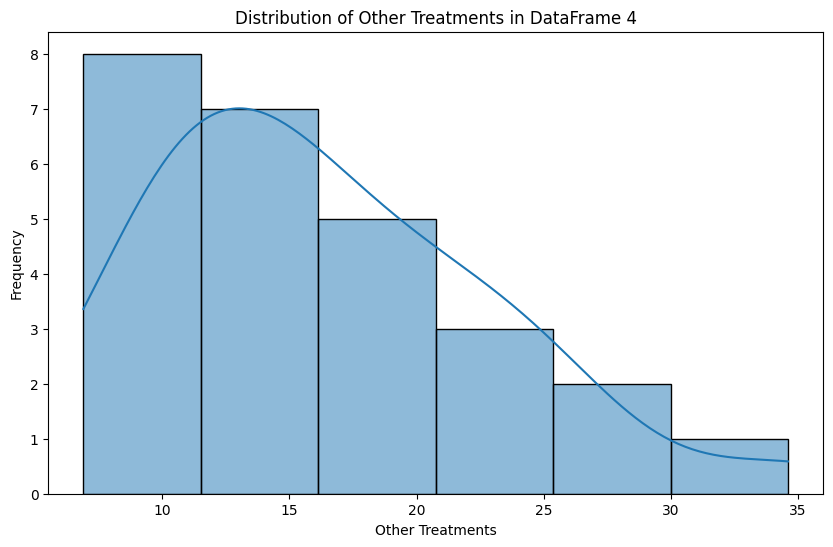

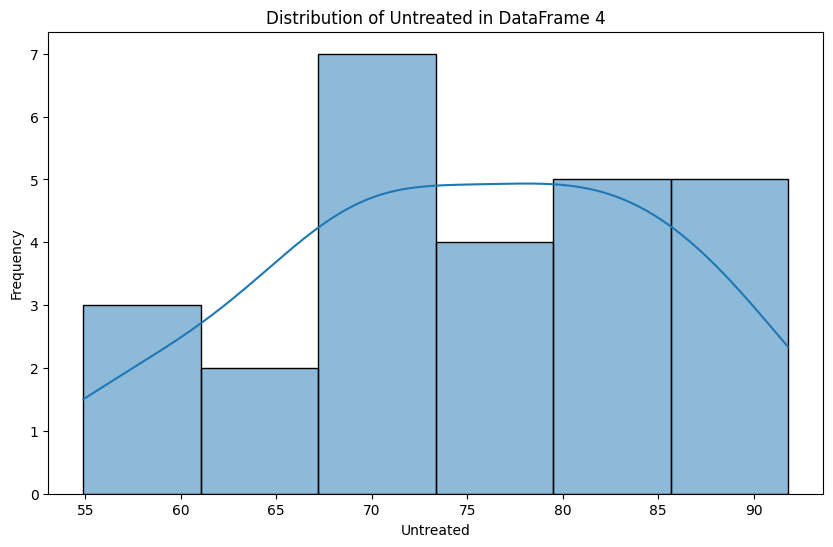


Plotting histograms for DataFrame 5


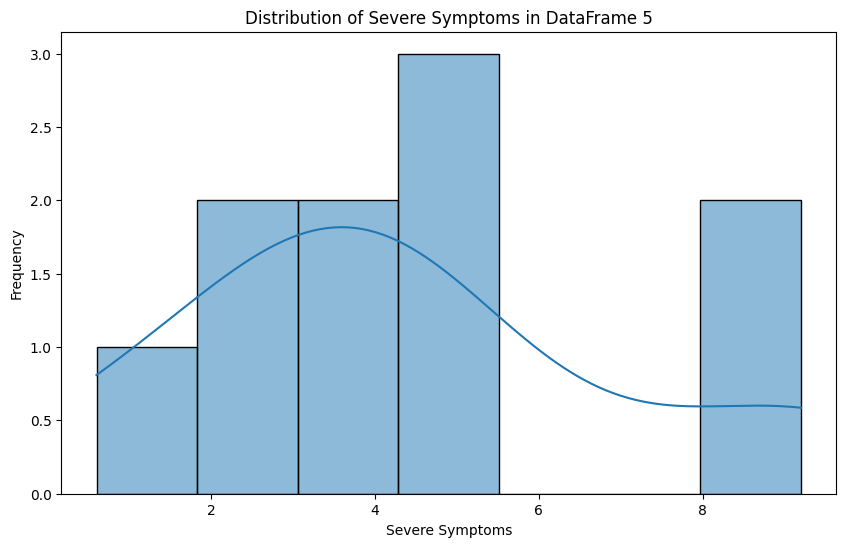

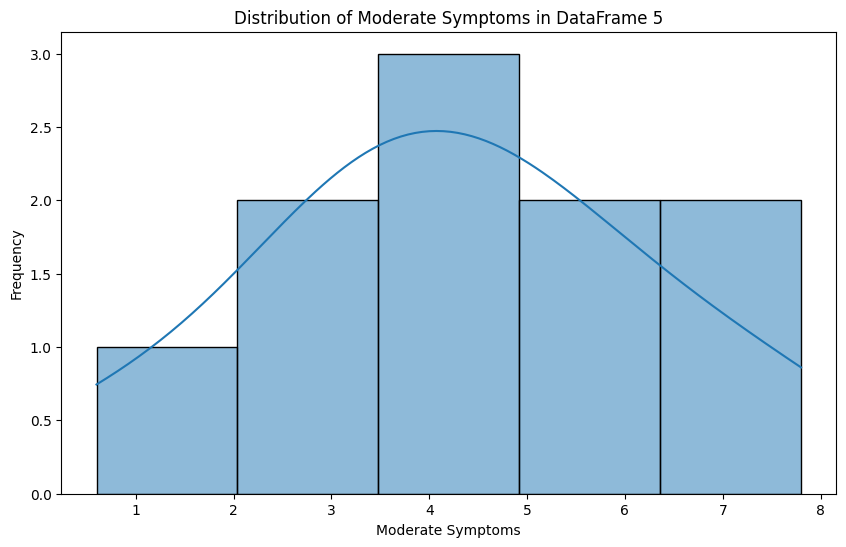

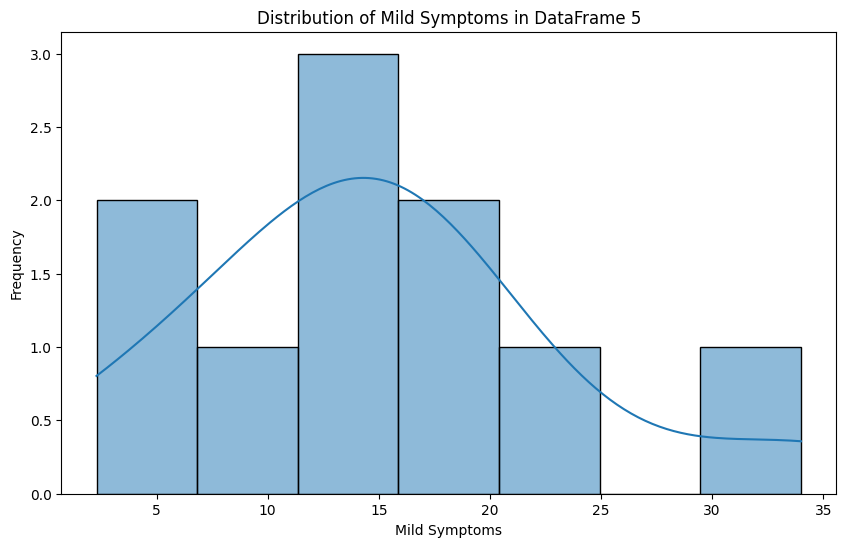

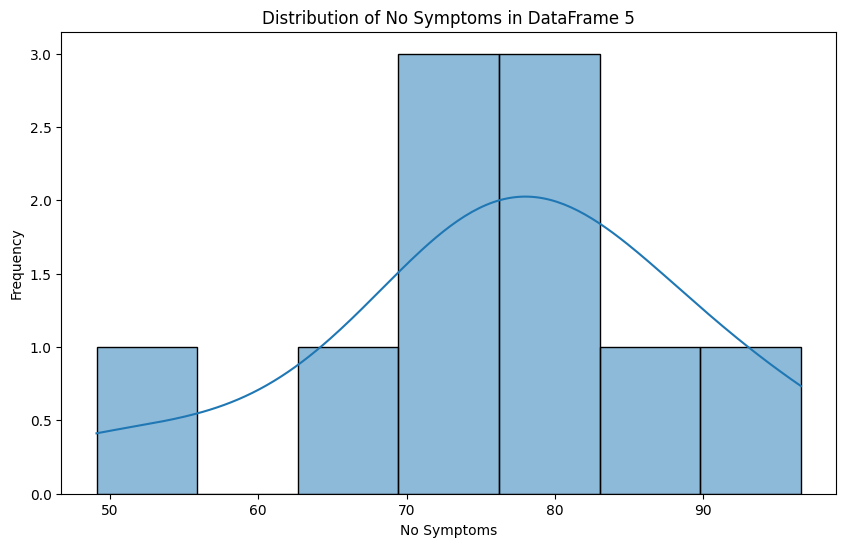


Plotting histograms for DataFrame 6


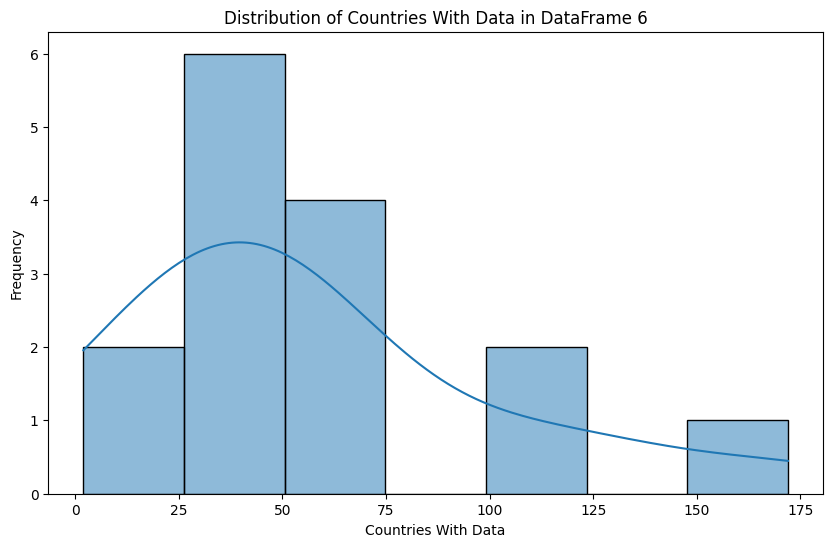

In [114]:
# Function to generate histograms for all numeric columns except 'year'
def plot_histograms(dfs):
  """
    Generates and displays histograms for all numeric columns in each DataFrame
    in the list, skipping the 'year' column if it exists.

    Parameters:
    -----------
    dfs : list of pandas.DataFrame
        A list of DataFrames to plot histograms from.
  """
  for i, df in enumerate(dfs):
    print(f"\nPlotting histograms for DataFrame {i}")
    for col in df.select_dtypes(include='number').columns:
      if col != 'year':  # Skip the 'year' column
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col].dropna(), kde=True) # Drop NA values for plotting
        plt.title(f'Distribution of {col.replace("_", " ").title()} in DataFrame {i}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel('Frequency')
        plt.show()

# Call the function to plot histograms for all numeric columns except 'year'
plot_histograms(dfs)


In [117]:
columns_for_correlation = ['schizophrenia_disorders',
                                 'depression_disorders',
                                 'anxiety_disorders',
                                 'bipolar_disorders',
                                 'eating_disorders']

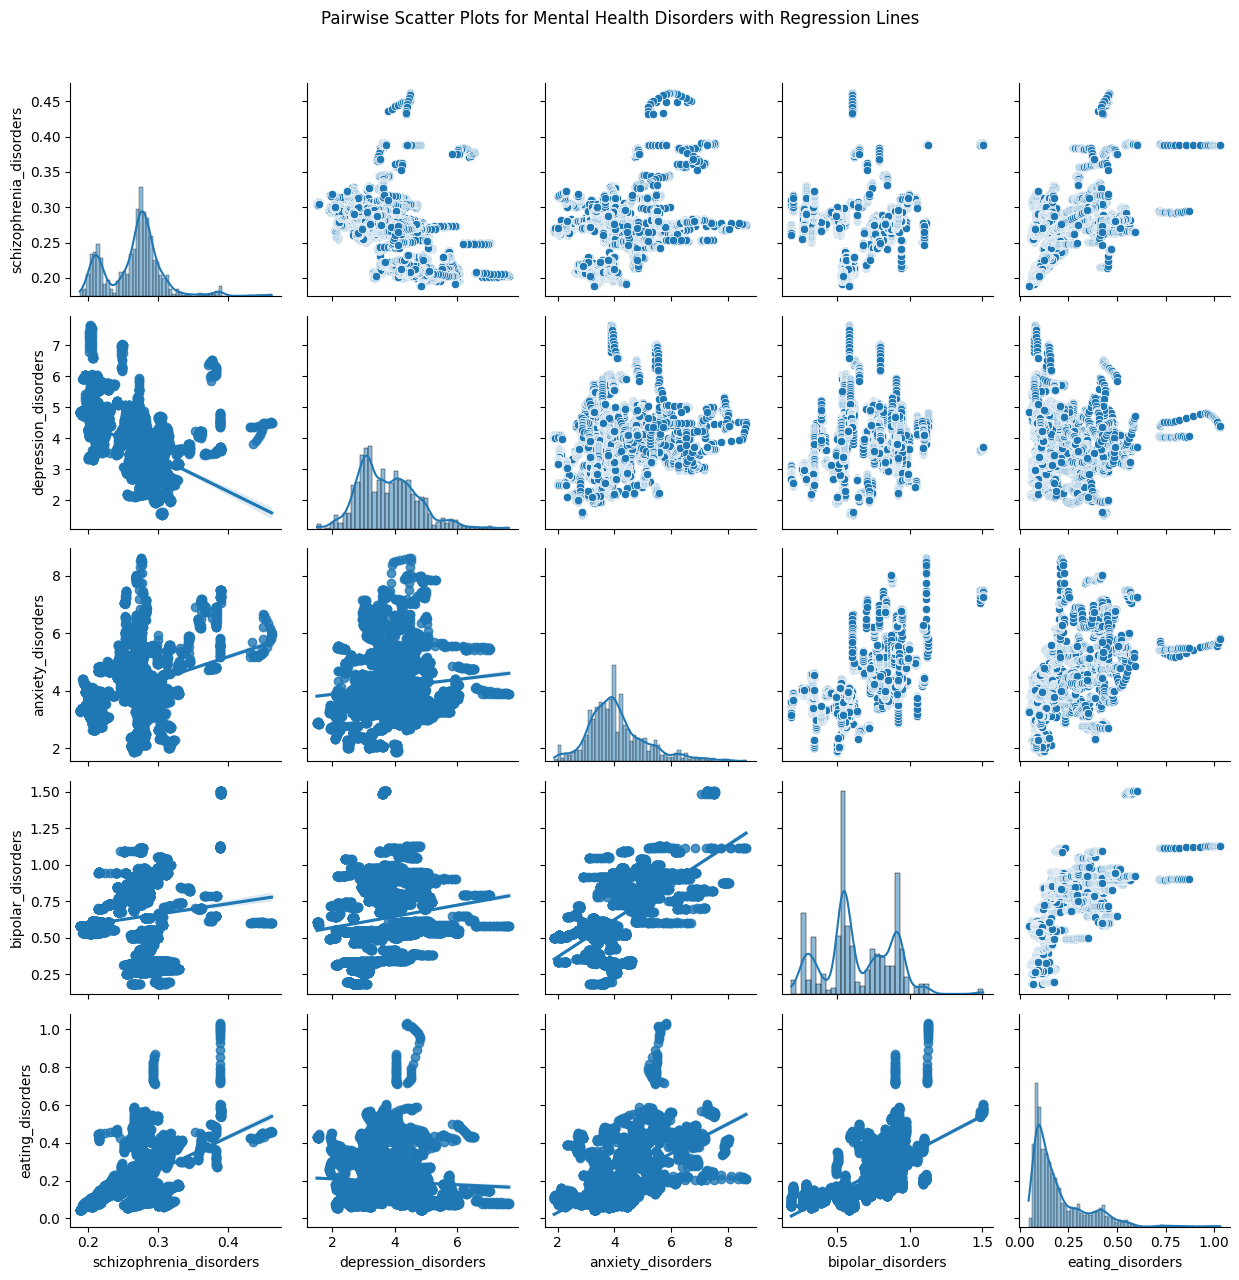

In [118]:
pair_grid = sns.PairGrid(dfs[0], vars=columns_for_correlation)
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_lower(sns.regplot)
pair_grid.map_diag(sns.histplot, kde=True)
plt.suptitle('Pairwise Scatter Plots for Mental Health Disorders with Regression Lines', y=1.02)
plt.tight_layout()
plt.show()
# we need to make the points smaller I think.



Plotting scatter plots for DataFrame 0


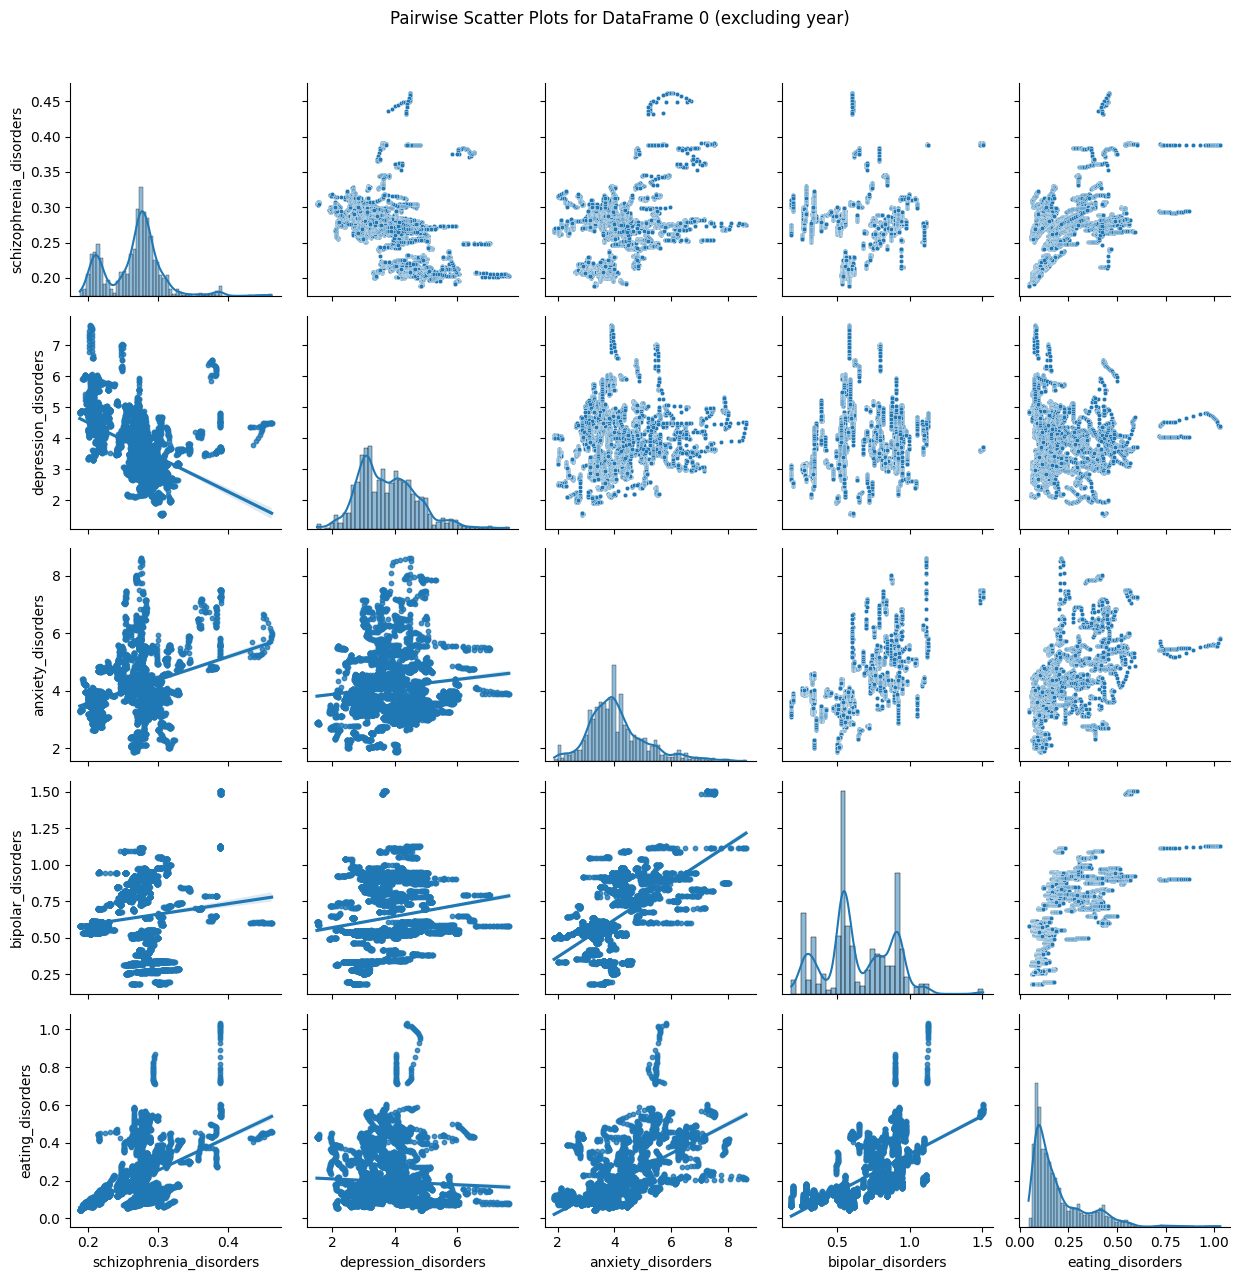


Plotting scatter plots for DataFrame 1


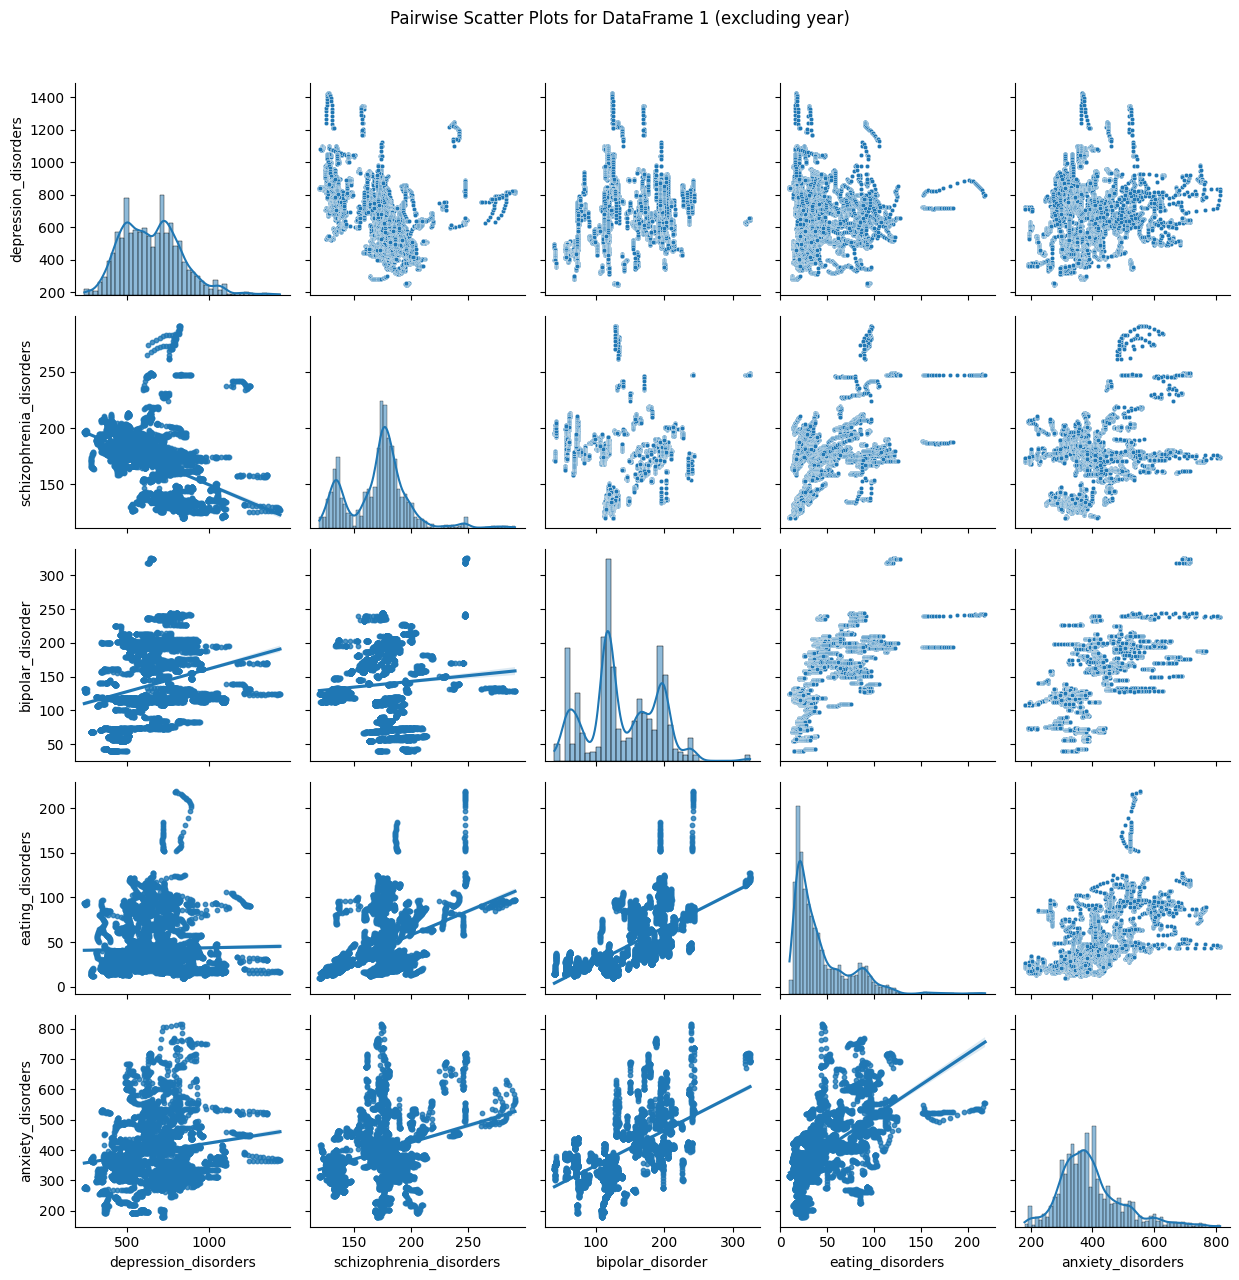


Plotting scatter plots for DataFrame 2
DataFrame 2 has less than two numeric columns to plot scatter plots for (excluding year). Skipping scatter plot.

Plotting scatter plots for DataFrame 3


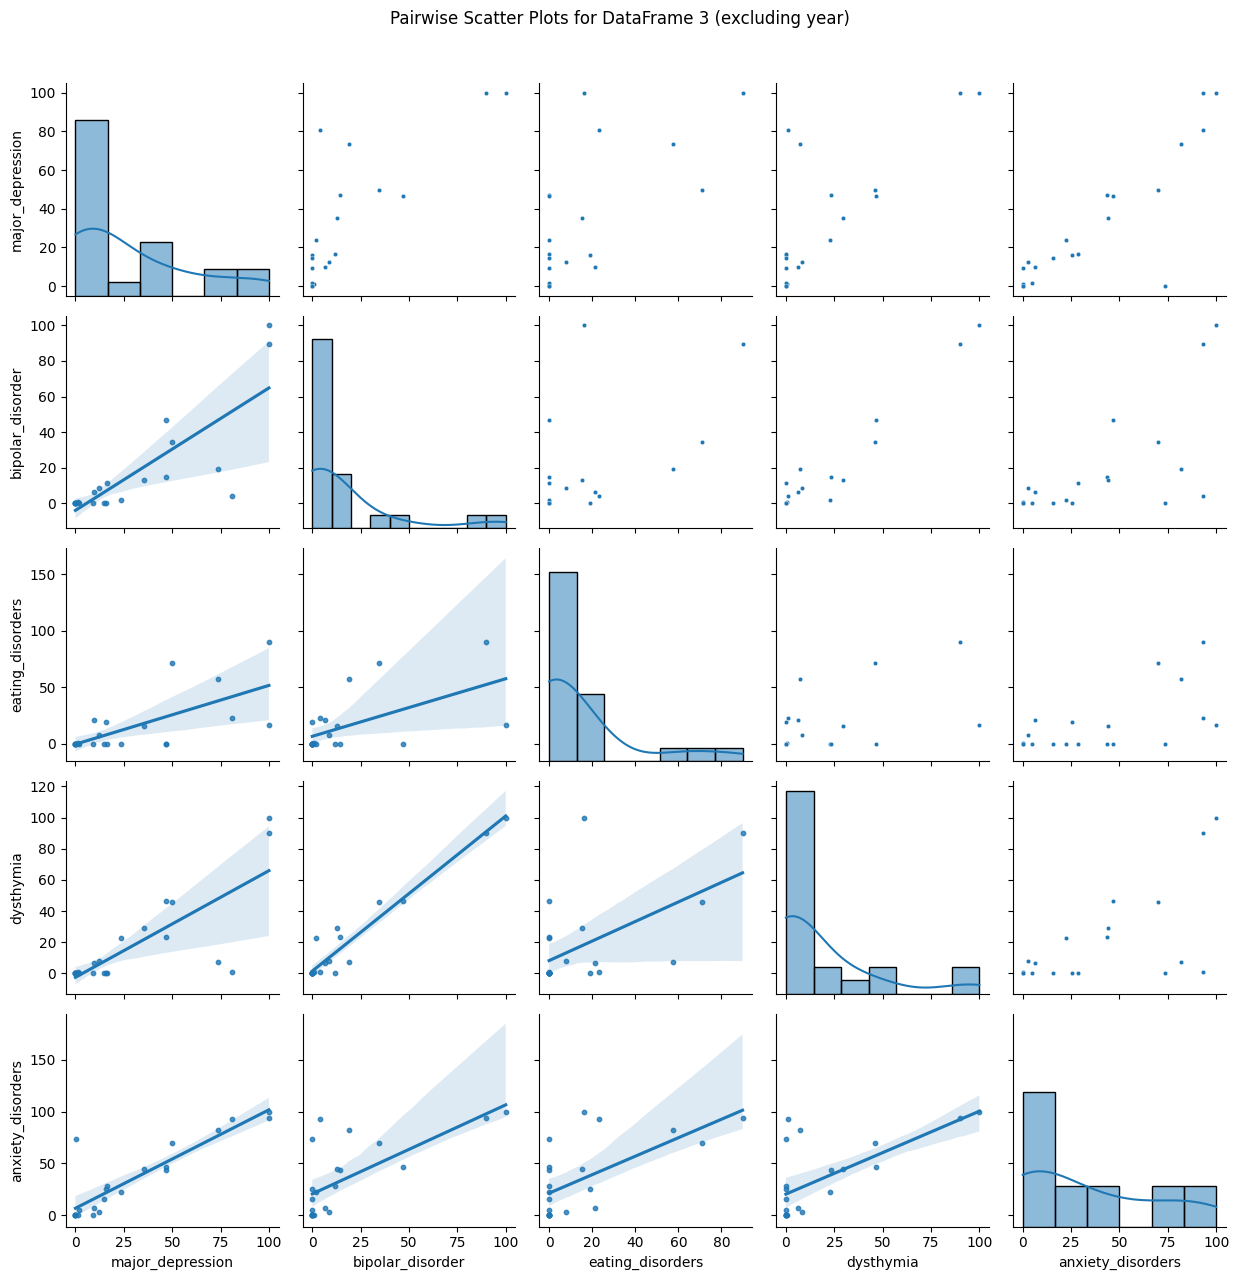


Plotting scatter plots for DataFrame 4


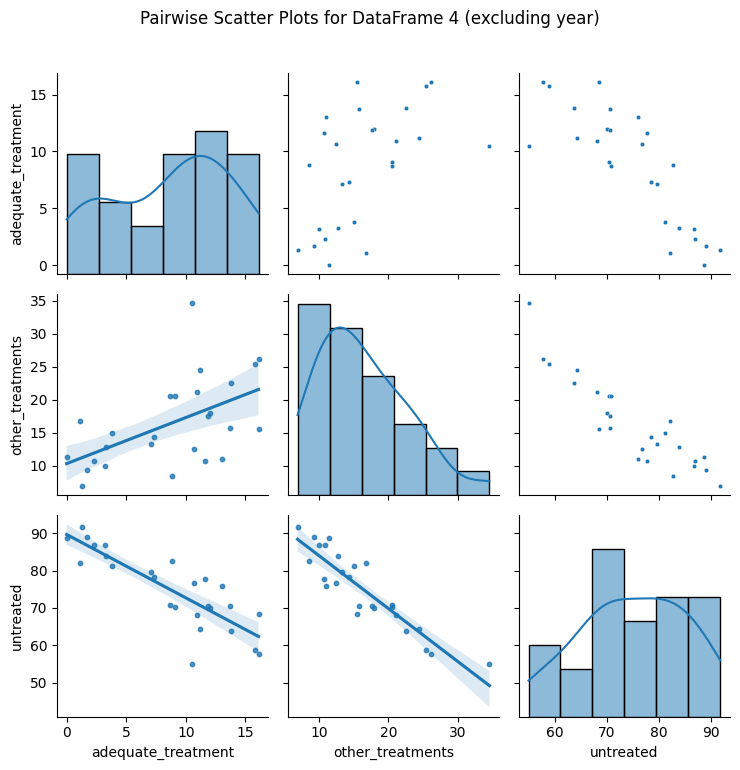


Plotting scatter plots for DataFrame 5


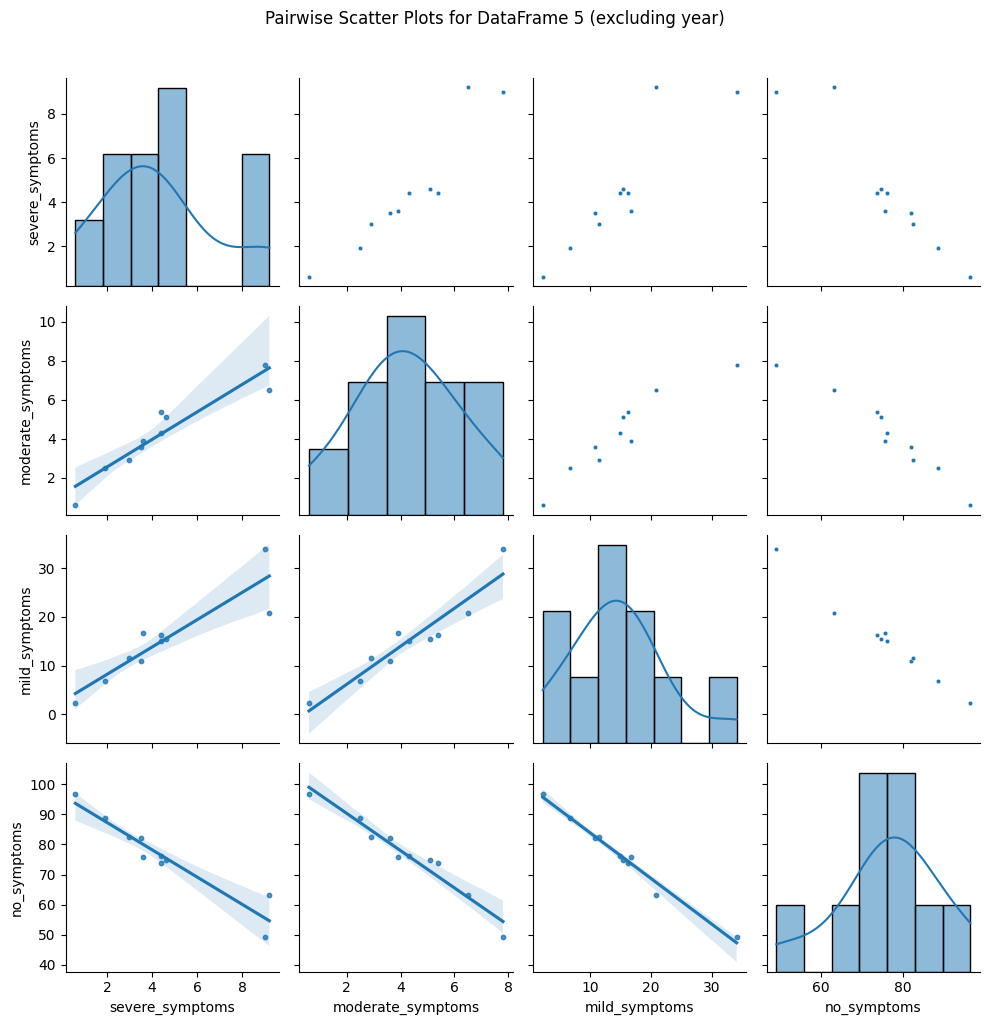


Plotting scatter plots for DataFrame 6
DataFrame 6 has less than two numeric columns to plot scatter plots for (excluding year). Skipping scatter plot.


In [119]:
# Generate more Scatter plots for more datasets
# Function to generate scatter plots for all numeric column pairs except 'year'
def plot_scatterplots(dfs):
  """
    Generates and displays scatter plots for all pairs of numeric columns
    in each DataFrame in the list, skipping the 'year' column if it exists.

    Parameters:
    -----------
    dfs : list of pandas.DataFrame
        A list of DataFrames to plot scatter plots from.
  """
  for i, df in enumerate(dfs):
    print(f"\nPlotting scatter plots for DataFrame {i}")
    numeric_cols = df.select_dtypes(include='number').columns
    # Filter out the 'year' column if it exists
    plot_cols = [col for col in numeric_cols if col != 'year']

    # Create a PairGrid for all pairwise scatter plots of numeric columns
    # Use a subset of columns if there are too many to avoid excessive plotting
    if len(plot_cols) > 1:
        # Limit the number of columns for plotting if it's too large
        max_cols_for_pairplot = 10
        if len(plot_cols) > max_cols_for_pairplot:
            print(f"DataFrame {i} has more than {max_cols_for_pairplot} numeric columns (excluding year). Plotting a subset.")
            # You might want to select specific columns here based on relevance
            # For now, just take the first max_cols_for_pairplot columns
            cols_to_plot = plot_cols[:max_cols_for_pairplot]
        else:
            cols_to_plot = plot_cols

        if len(cols_to_plot) > 1:
            pair_grid = sns.PairGrid(df, vars=cols_to_plot)
            # Use regplot for regression lines
            pair_grid.map_upper(sns.scatterplot, s=10) # smaller points
            pair_grid.map_lower(sns.regplot, scatter_kws={'s': 10}) # smaller points
            pair_grid.map_diag(sns.histplot, kde=True)

            plt.suptitle(f'Pairwise Scatter Plots for DataFrame {i} (excluding year)', y=1.02)
            plt.tight_layout()
            plt.show()
        else:
            print(f"DataFrame {i} has only one numeric column to plot scatter plots for (excluding year). Skipping scatter plot.")
    else:
        print(f"DataFrame {i} has less than two numeric columns to plot scatter plots for (excluding year). Skipping scatter plot.")

# Call the function to plot scatter plots for all datasets, excluding the year column
plot_scatterplots(dfs)
